In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
featurs= ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [ ]:
df['Outcome'].unique()

array([1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.65)

In [ ]:
X_train = train[featurs]
Y_train = train['Outcome']

X_test = test[featurs]
Y_test = test['Outcome']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [ ]:
model = RandomForestClassifier(n_estimators=116,random_state=116,max_depth=4)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, n_estimators=116, random_state=116)

In [315]:
model.score(X_test,Y_test)

0.79182156133829

In [316]:
Y_pred=model.predict(X_test)
print(Y_pred)

[0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1
 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0]


In [317]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[167,  19],
       [ 37,  46]])

Text(33.22222222222222, 0.5, 'real')

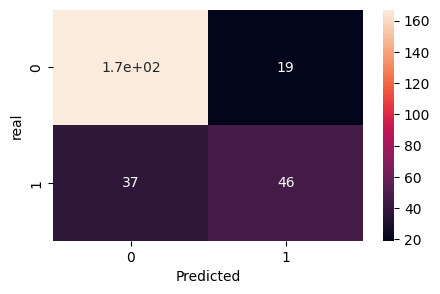

In [318]:
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('real')

In [319]:
score = accuracy_score(Y_test, Y_pred)*100
acc = round(score, 2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy: ',acc, '%, ', corr, 'correct detections')
print('Inaccuracy: ',inac, '%, ', len(test)-corr, 'Incorrect detections')

Accuracy:  79.18 %,  213.0 correct detections
Inaccuracy:  20.82 %,  56.0 Incorrect detections


In [320]:
df.loc[0]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64

In [321]:
input_data = (6, 148, 72, 35, 0, 33.6, 0.62, 50)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

if prediction == [1]:
  print("Diabetes Detected")
else:
  print("Diabetes not detected")

Diabetes Detected


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Loading and Saving the model**

In [322]:
import pickle

In [323]:
filename = 'Diabetes_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [324]:
loaded_model = pickle.load(open(filename, 'rb'))